# Lab 9: Ordinary differential equations (2)

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    **YOUR NAME HERE**
* SID:     **YOUR STUDENT NUMBER**

## Ordinary differential equations (2)

In this lab we'll continue to explore the use of `solve_ivp` to solve differential equations. In particular, we will look at *anharmonic* oscillators, which occur frequently throughout physics but have more complicated solutions than  familiar simple harmonic motion.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


## Anharmonic oscillator, version 1: asymmetric potential

First, consider the following potential:

$$\begin{align}
V(x) &= \tfrac12 k x^2(1 - \tfrac23 \alpha x) \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx(1 - \alpha x) \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx(1 - \alpha x)
\end{align}$$

When $\alpha = 0$, this reduces to the familiar harmonic oscillator, but for $\alpha > 0$ this produces a weaker restoring force for positive $x$ than for negative $x$.

To get a sense of this, **plot $V(x)$ for $k = 1$ and $\alpha = \tfrac14$**.

<Figure size 864x504 with 0 Axes>

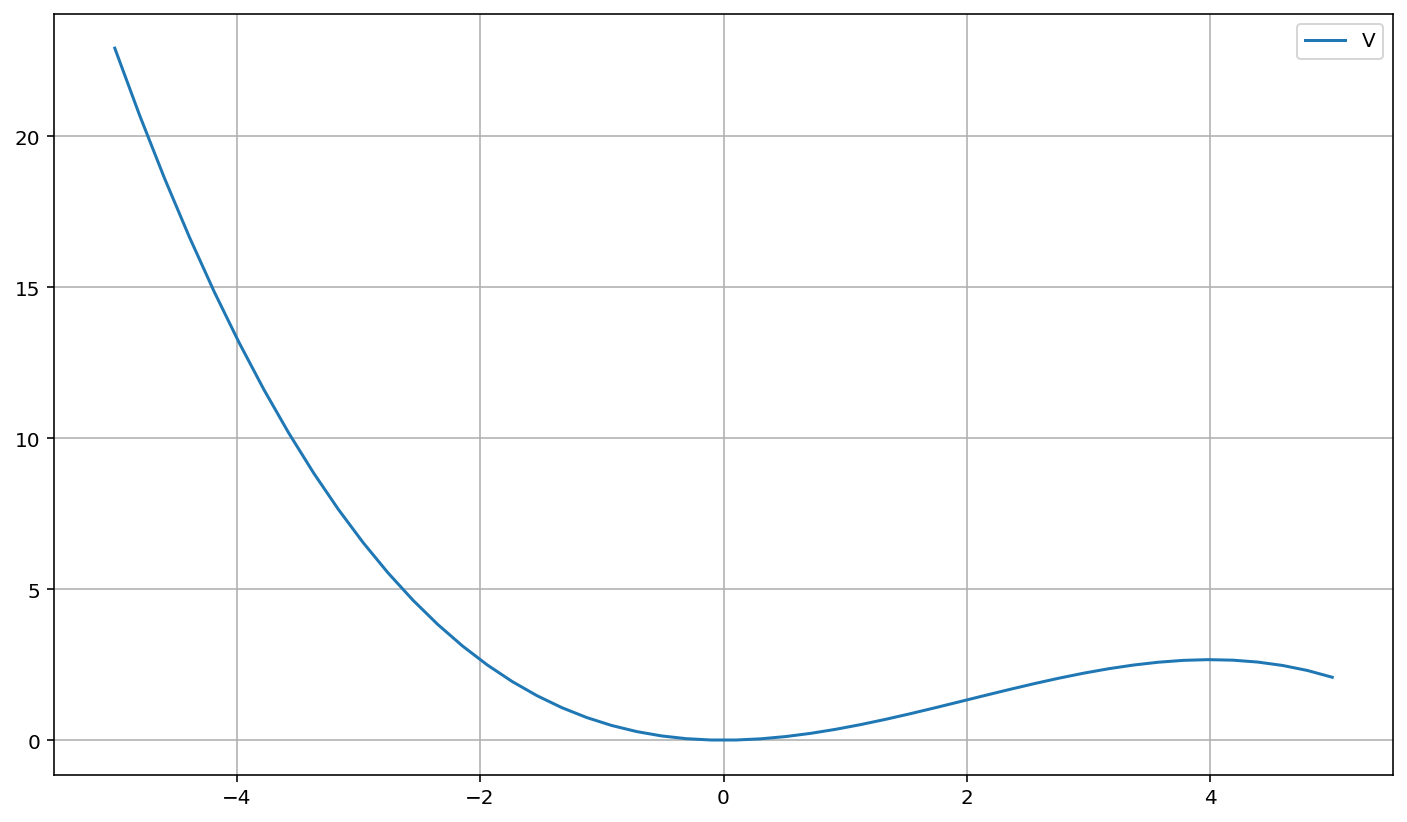

<Figure size 864x504 with 0 Axes>

In [73]:

k = 1
a = 1/4
m = 1

def V(x):
    return 0.5*k*x**2*(1-(2/3)*a*x)

def der(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k*x0*(1-a*x0))/m
    return np.array((dx0, dx1))


xlist = np.linspace(-5,5,50)
plt.plot(xlist,V(xlist),label='V')
plt.legend()
plt.grid()
plt.figure()

For the same $k$ and $\alpha$ values as above, and setting $m = 1$ for simplicity, **solve this ODE** with initial conditions $x = -1.9$, $v = 0$, considering a large enough time range to see at least three complete oscillations. **Plot $x$ as a function of $t$.** What do you notice about the shape of this curve? Is it what you expect?

<Figure size 864x504 with 0 Axes>

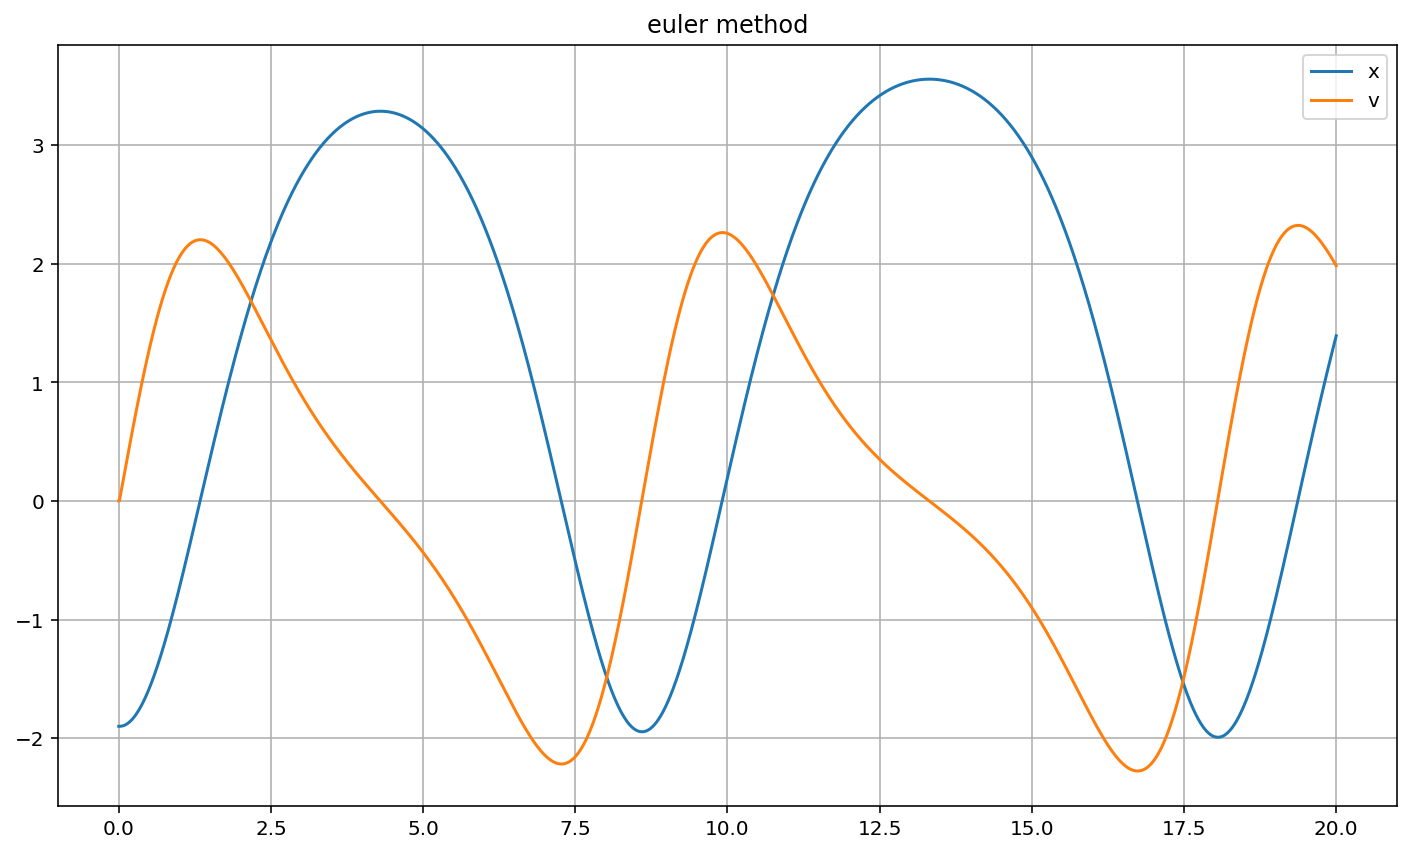

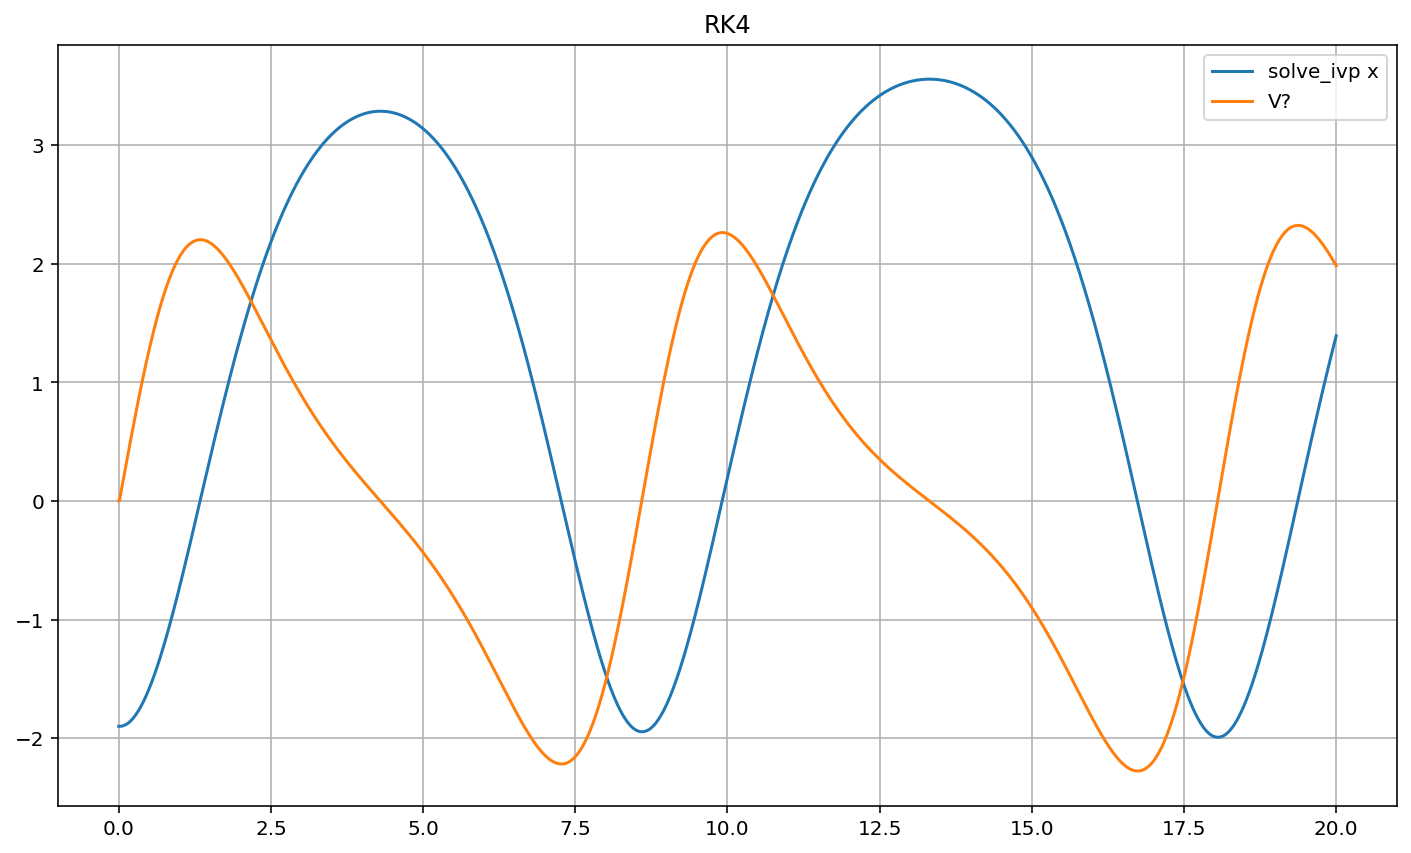

<Figure size 864x504 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

t_total = 20
dt = 0.01
t = 0
x = np.array((-1.9, 0))
v = np.array((0, 0))

t_list = [t]
x_list = [x]
v_list = [v]

k = 1
a = 1/4
m = 1

def der(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k*x0*(1-a*x0))/m
    return np.array((dx0, dx1))

for i in range(0,int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = der(t,x)

    t_list.append(t)
    x_list.append(x)
    v_list.append(v)

x1_list = []
for i in x_list:
    x1_list.append(i[0])

def derR(t,x):
    return (-k*x*(1-a*x))/m

sol = solve_ivp(derR,[0,max(t_list)],x1_list,t_eval=t_list)

v_num = []
for i in v_list:
    v_num.append(i[0])

t_list = np.array(t_list)
x_list = np.array(x_list)
v_list = np.array(v_list)

plt.plot(t_list,x_list[:,0],label='x')
plt.plot(t_list,v_list[:,0],label='v')
plt.title('euler method')
plt.grid()
plt.legend()
plt.figure()

plt.plot(sol.t,sol.y[:,0], label='solve_ivp x')
plt.plot(sol.t,v_num,label='V?')
plt.title('RK4')
plt.grid()
plt.legend()
plt.figure()

On the same axes, **plot the solution for the same initial conditions and value of $k$, but with $\alpha$ ranging from 0 to 0.3 in steps of 0.05.** How, qualitatively, does $\alpha$ affect the amplitude and period of oscillation?

[array([-1.        , -0.99765174, -0.99062117, -0.97895153, -0.96270895,
       -0.9419835 , -0.91688951, -0.88756558, -0.85417452, -0.81690344,
       -0.77596361, -0.73157295, -0.68396449, -0.63338781, -0.58009599,
       -0.52434566, -0.46639698, -0.40651363, -0.34496284, -0.28201536,
       -0.21794547, -0.153031  , -0.08755329, -0.02178827,  0.04404915,
        0.10972984,  0.17502769,  0.23972756,  0.30362532,  0.36652777,
        0.42825273,  0.48862896,  0.54749623,  0.60470528,  0.6601178 ,
        0.7136065 ,  0.76505503,  0.8143587 ,  0.86143371,  0.90620335,
        0.94859467,  0.9885403 ,  1.02597844,  1.06085285,  1.0931129 ,
        1.12271351,  1.14961516,  1.17378394,  1.19519149,  1.21381502,
        1.22963734,  1.24264682,  1.25283739,  1.26020857,  1.26477257,
        1.26654211,  1.26549839,  1.26162651,  1.25491712,  1.24536645,
        1.23297632,  1.21775411,  1.19971279,  1.1788709 ,  1.15525256,
        1.12888744,  1.09981083,  1.06806357,  1.03369208,  0.9

Text(0, 0.5, 'x')

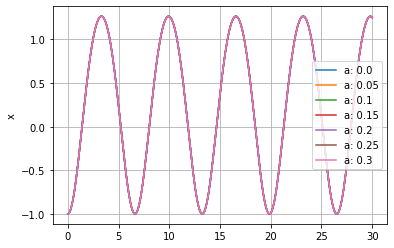

In [10]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

avals = linspace(0,0.3,7)

dt = 0.1
t_total = 30
t = 0
x = array((-1.9,0))

k = 1
m = 1

def SD(t,x):
    x0, x1 = x
    dx0 = x1
    dx1 = -(k * x0 * (1 - a * x0))/m
    return array((dx0, dx1))

sd_l = []
x_l = []
'''
#for a in avals:
    #sd = SD(t,x)
    #sd_l.append(sd)
    #print(sd)
    #x_l.append(sd[1])

RK4_l = []
t_l = []
'''
plt.figure()
for a in avals:
    sol = solve_ivp(SD,(t,t_total),(-1.,0),t_eval = np.linspace(0,30,500))
    RK4_l.append(sol.y[0])
    t_l.append(sol.t)
print(RK4_l)

for i in range(0,7):
    plt.plot(t_l[i],RK4_l[i],label=f'a: {round(avals[i],3)}')
plt.legend()
plt.grid()
plt.ylabel('x')


To make this more quantitative, devise a method to **find the first minimum of each of the curves** in that plot – that is, the period of oscillation. **Plot the period $\tau$ as a function of $\alpha$.**

*Hint:* use the `numpy.argmin` function to find the index of the minimum value of $x$, then look up this index in the $t$ array.

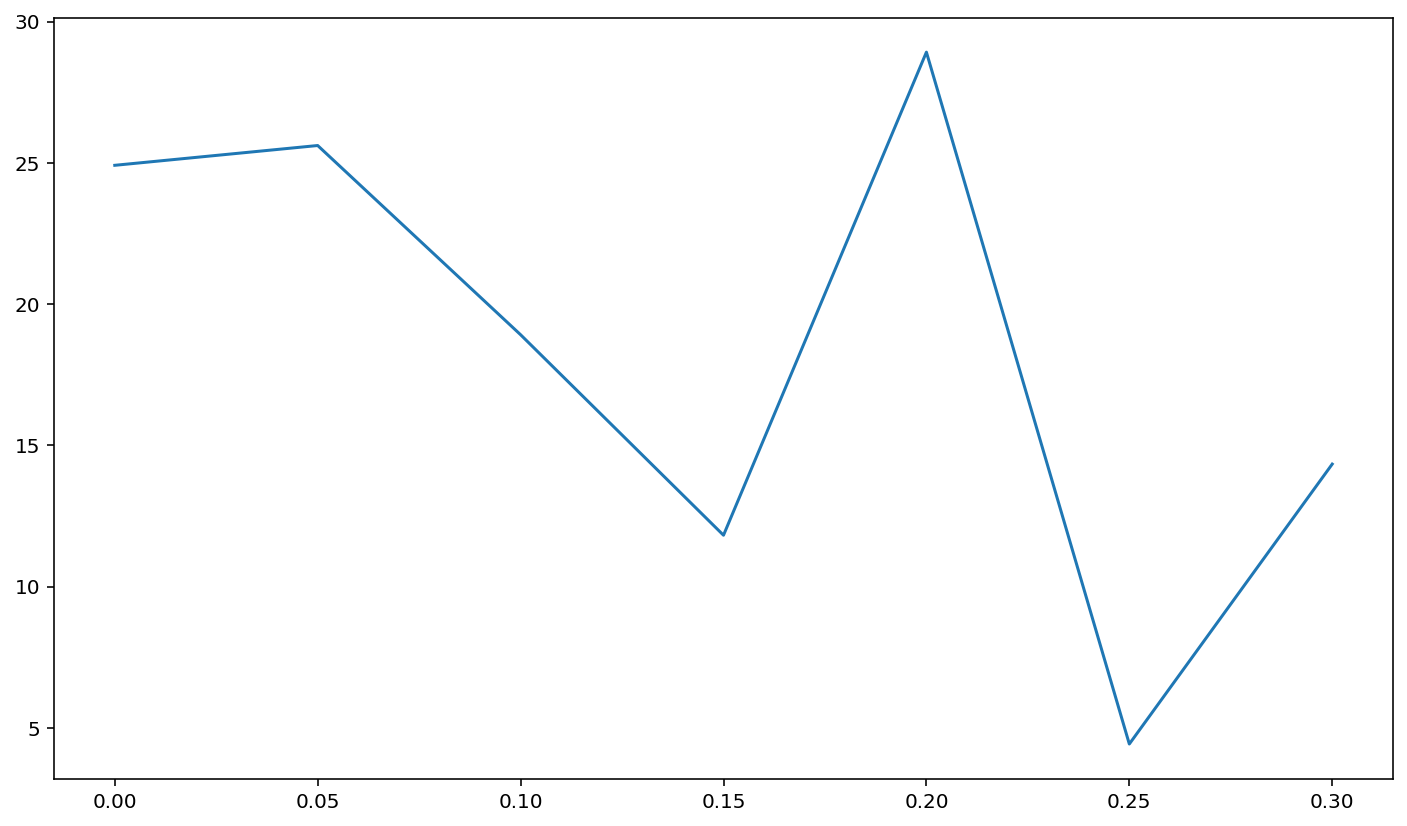

In [4]:
from numpy import *

tmins = []
for i in range(0,7):
    xmin = argmin(RK4_l[i])
    tmins.append(t_l[i][xmin])

plt.plot(avals,tmins)

In a similar way, setting $\alpha$ back to $\tfrac14$, **plot solutions on the same axes for initial $x$ values between $0$ and $-2$.** **Plot the period $\tau$ as a function of $x_0$** and hence show that, unlike the harmonic oscillator, this anharmonic oscillator is *not isochronous*, that is, the period $\tau$ depends on the amplitude of oscillation.

[ 0. -0.]
[0.        0.2345679]
[0.         0.49382716]
[0.         0.77777778]
[0.         1.08641975]
[0.         1.41975309]
[0.         1.77777778]
[0.         2.16049383]
[0.         2.56790123]
[0. 3.]
-0.0
0.2345679012345679
0.49382716049382713
0.7777777777777778
1.0864197530864197
1.419753086419753


1.7777777777777777
2.1604938271604937
2.567901234567901
3.0


Text(0, 0.5, 'x')

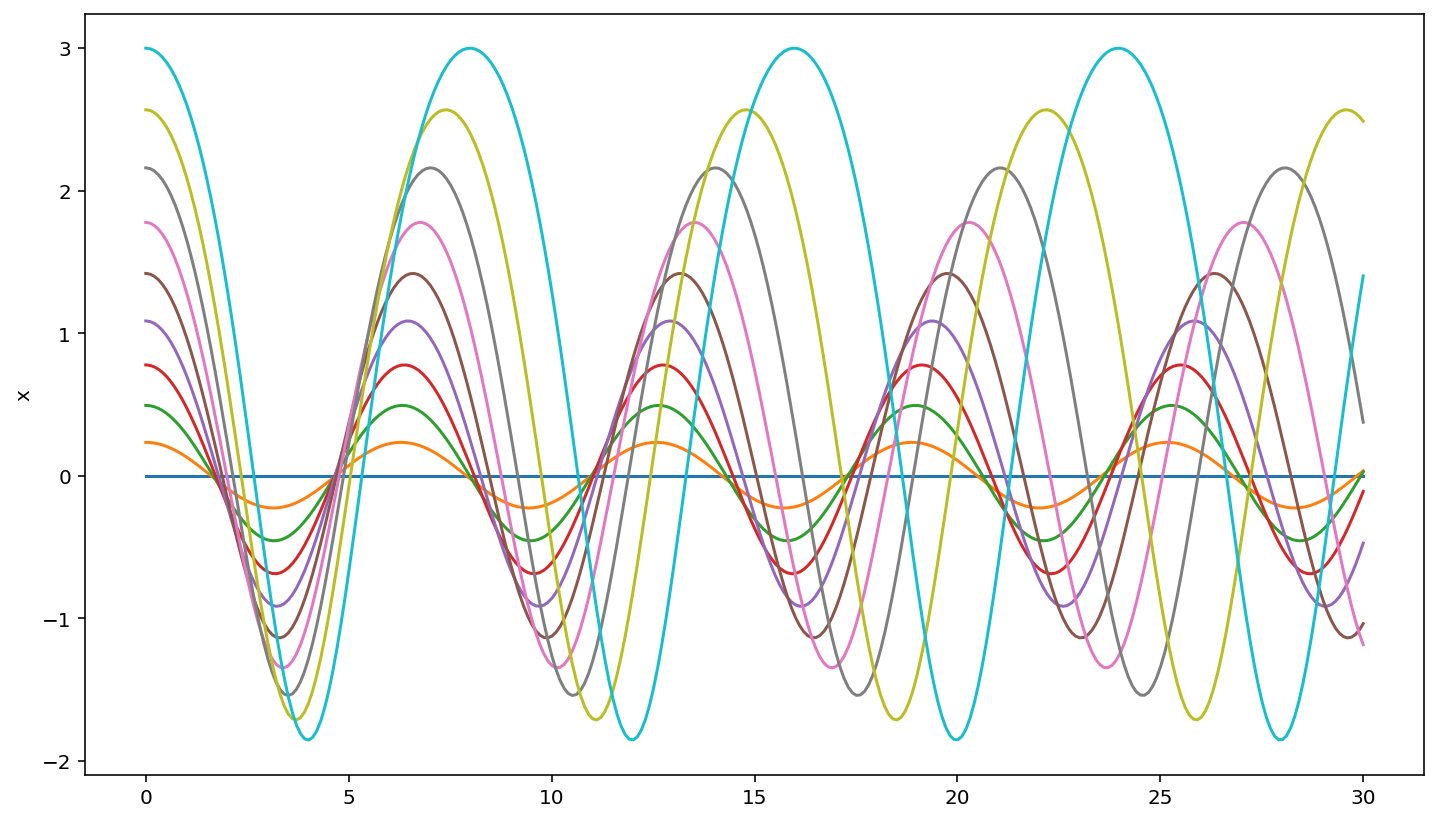

In [10]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

xvals = linspace(0,-2,10)

dt = 0.1
t_total = 30
t = 0
a = 1/4
k = 1
m = 1

def SD(t,x):
    x0, x1 = x
    dx0 = x1
    dx1 = -(k * x0 * (1 - a * x0))/m
    return array((dx0, dx1))

sd_l = []
x_l = []

for x in xvals:
    x = np.array((x,0))
    sd = SD(t,x)
    sd_l.append(sd)
    print(sd)
    x_l.append(sd[1])

RK4_l = []
t_l = []

for n in x_l:
    print(n)
    n = array((n,0))
    sol = solve_ivp(SD,(t,t_total),n,max_step=dt,)
    RK4_l.append(sol.y[0])
    t_l.append(sol.t)

plt.figure()

for i in range(0,10):
    plt.plot(t_l[i],RK4_l[i])
plt.ylabel('x')


▶ **CHECKPOINT 1**

## Anharmonic oscillator, version 2: symmetrical potential

An alternative anharmonic potential has no harmonic (second-order) term at all; instead, the leading term is of even order $p \geq 4$.

$$\begin{align}
V(x) &= \frac kp x^p \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx^{p-1} \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1}
\end{align}$$

**Plot $V(x)$ for $p = 2, 4, 6$.**

<Figure size 864x504 with 0 Axes>

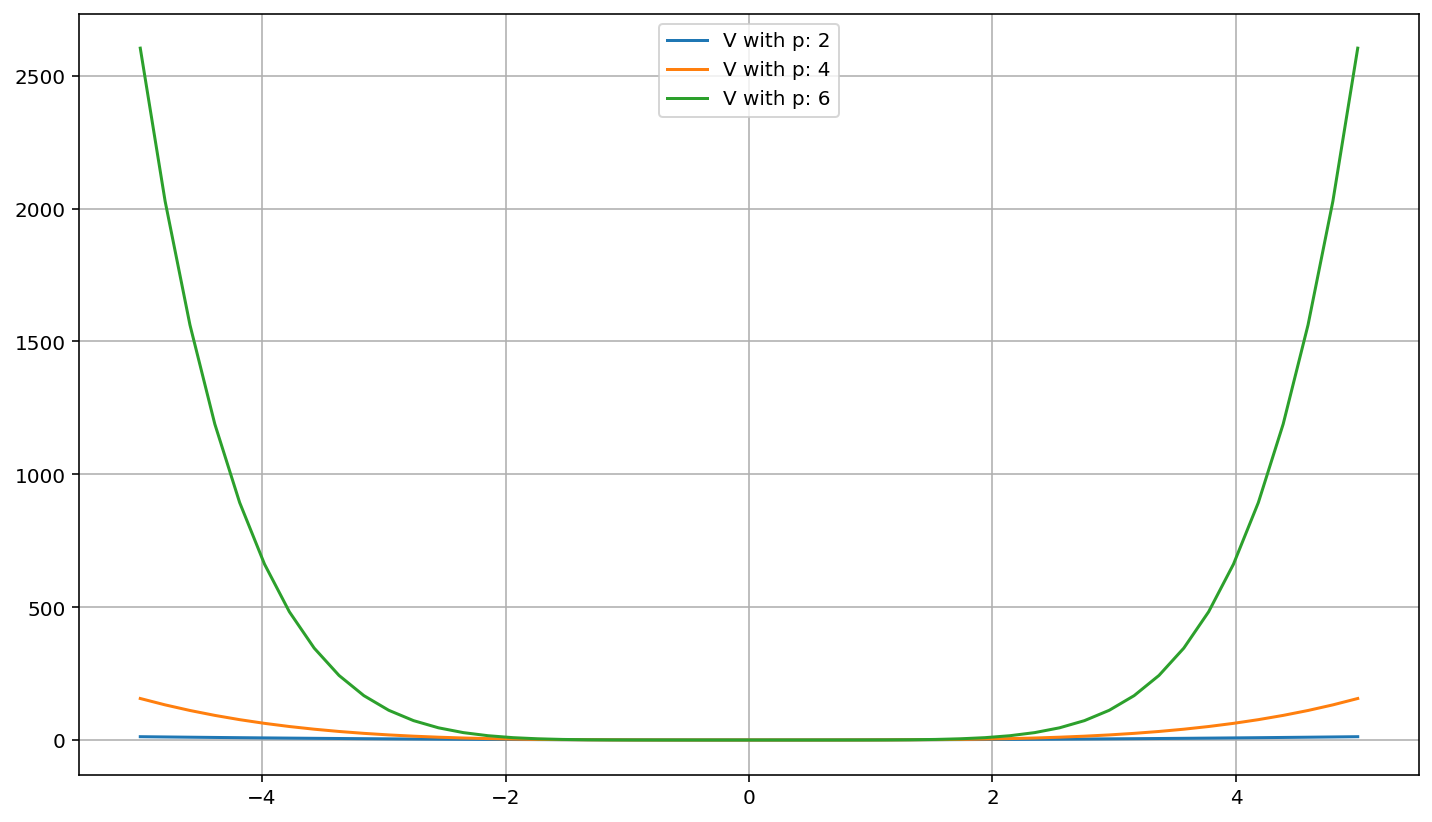

<Figure size 864x504 with 0 Axes>

In [85]:
pvals = [2,4,6]
for p in pvals:
    k = 1
    a = 1/4
    m = 1

    def v(x):
        return (k/p)*x**p
    
    def der(t, x):
        x0, x1 = x
        dx0 = x1
        dx1 = -(k*x0**(p-1))/m
        return np.array((dx0, dx1))
        

    xlist = np.linspace(-5,5,50)
    plt.plot(xlist,v(xlist),label=f'V with p: {p}')
    plt.legend()
    plt.grid()
plt.figure()

**Solve this ODE** for the starting conditions $x = -1.5$, $v = 0$, with $k = 1$ and taking even values of $p$ from 2 to 12. **Plot your solutions**, showing $x$ as a function of time.

[1.5, 3.375, 7.59375, 17.0859375, 38.443359375, 86.49755859375]
1.5
3.375
7.59375
17.0859375
38.443359375
86.49755859375


<Figure size 864x504 with 0 Axes>

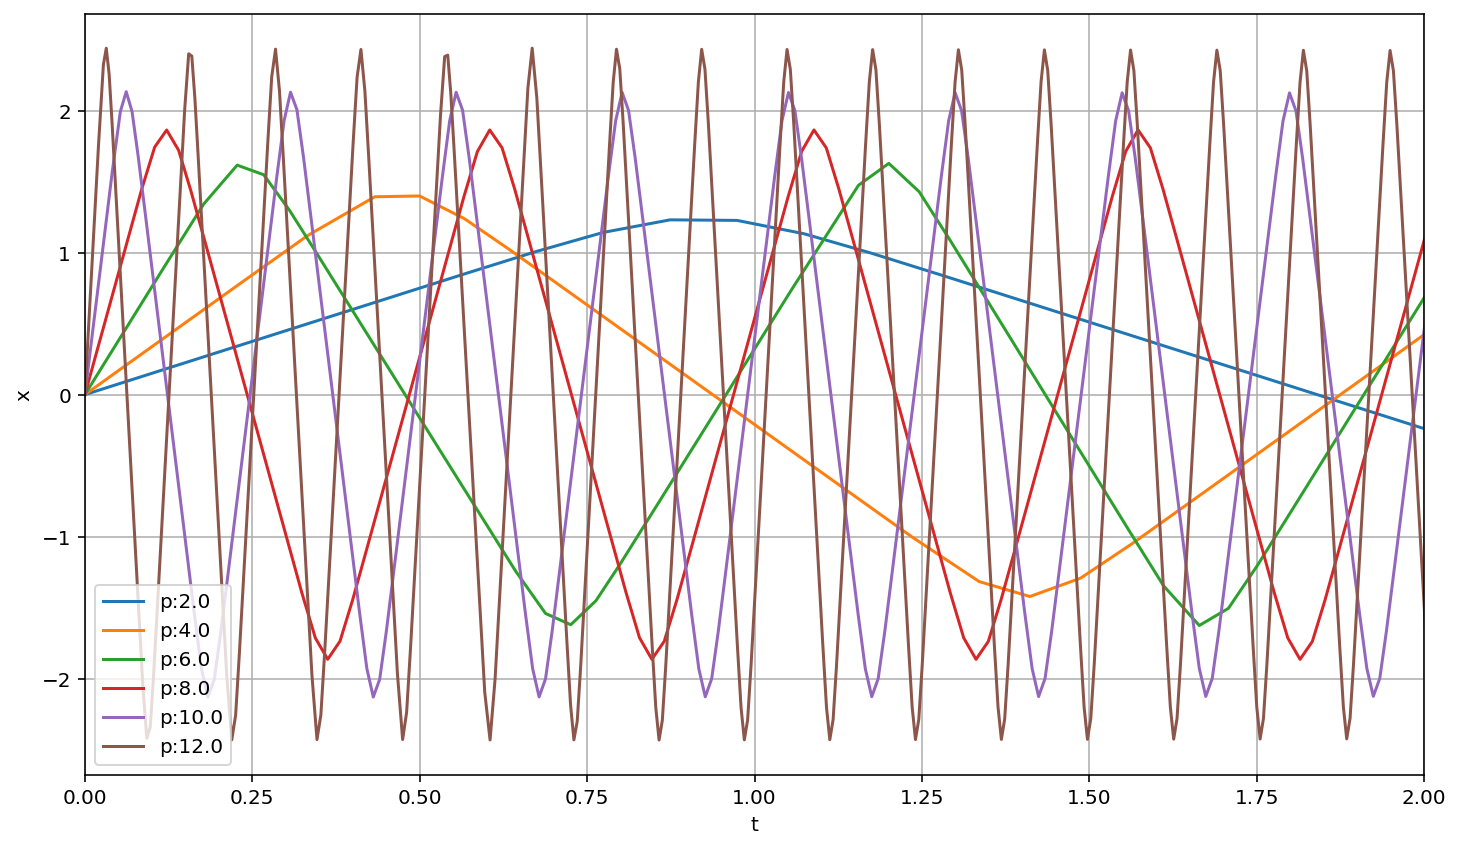

<Figure size 864x504 with 0 Axes>

In [11]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

pvals = linspace(2,12,6)

dt = 0.1
t_total = 5
t = 0
x = array((-1.5,0))
k = 1
m = 1

def der(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = -(k*x0**(p-1))/m
    return np.array((dx0, dx1))

sd_x = []

for p in pvals:
    SD = der(t,x)
    sd_x.append(SD[1])

print(sd_x)
n = 0
for x in sd_x:
    print(x)
    sol = solve_ivp(der,[t,t_total],[0,x],max_step=dt)
    plt.plot(sol.t,sol.y[0],label=f'p:{pvals[n]}')
    n = n + 1

plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.xlim(0,2)
plt.legend()
plt.figure()

Now hold $p = 6$ constant and **plot the solution for a range of initial values of $x$**. Show that, again, an anharmonic oscillator is not isochronous.

[-0.0, 1.0, 32.0, 243.0, 1024.0, 3125.0]


<Figure size 864x504 with 0 Axes>

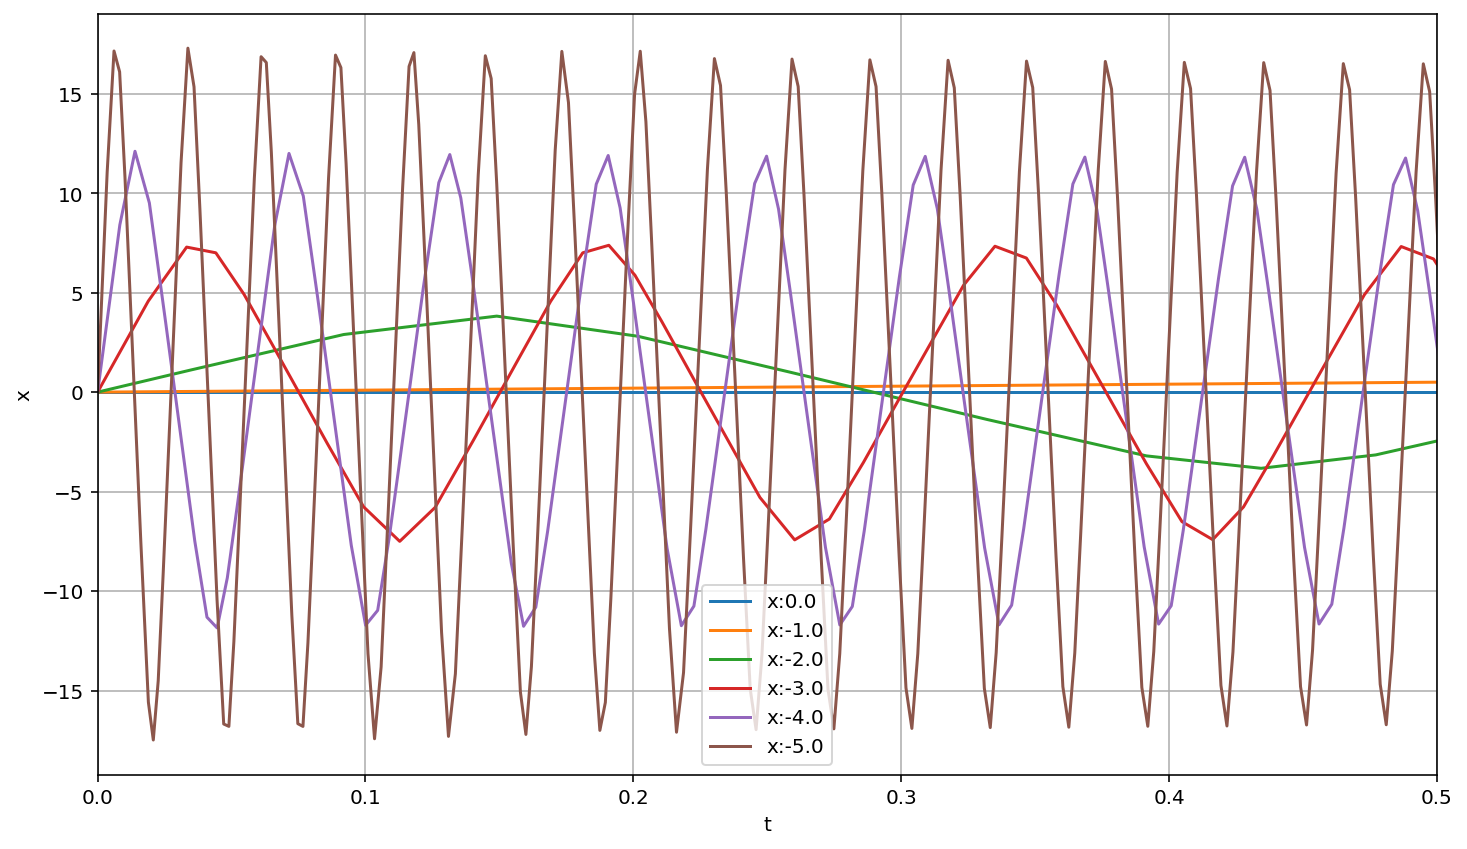

<Figure size 864x504 with 0 Axes>

In [124]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

xvals = linspace(0,-5,6)

dt = 0.1
t_total = 5
t = 0
x = array((-1.5,0))
k = 1
p = 6
m = 1

def der(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = -(k*x0**(p-1))/m
    return np.array((dx0, dx1))

sd_x = []

for x in xvals:
    x = array((x,0))
    SD = der(t,x)
    sd_x.append(SD[1])

print(sd_x)
n = 0
for x in sd_x:
    sol = solve_ivp(der,[t,t_total],[0,x],max_step=dt)
    plt.plot(sol.t,sol.y[0],label=f'x:{xvals[n]}')
    n = n + 1

plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.xlim(0,0.5)
plt.legend()
plt.figure()

▶ **CHECKPOINT 2**

##  Driven oscillations and resonance

We now consider the possibility that the force might depend on $t$ as well as $x$. Specifically, we consider the case of an oscillator "driven" (or "forced") at a particular angular frequency $\omega$:

$$\begin{align}
V(x) &= \frac kp x^p \\
F(t, x) &= -\frac{\mathrm dV}{\mathrm dx} + F(t) = -kx^{p-1} + A\sin(\omega t)\\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1} + A\sin(\omega t)
\end{align}$$

To start with, **solve this new equation** for $k = 1$, $p = 2$, $A = 1$, and $\omega$ distributed between 0.1 and 10. As always, **plot your results.** What do you notice about the amplitude of the oscillations?

[1.5998334166468282, 2.036760273455745, 0.5564513313640934, 2.44637184732655, 0.9559788891106302]


<Figure size 864x504 with 0 Axes>

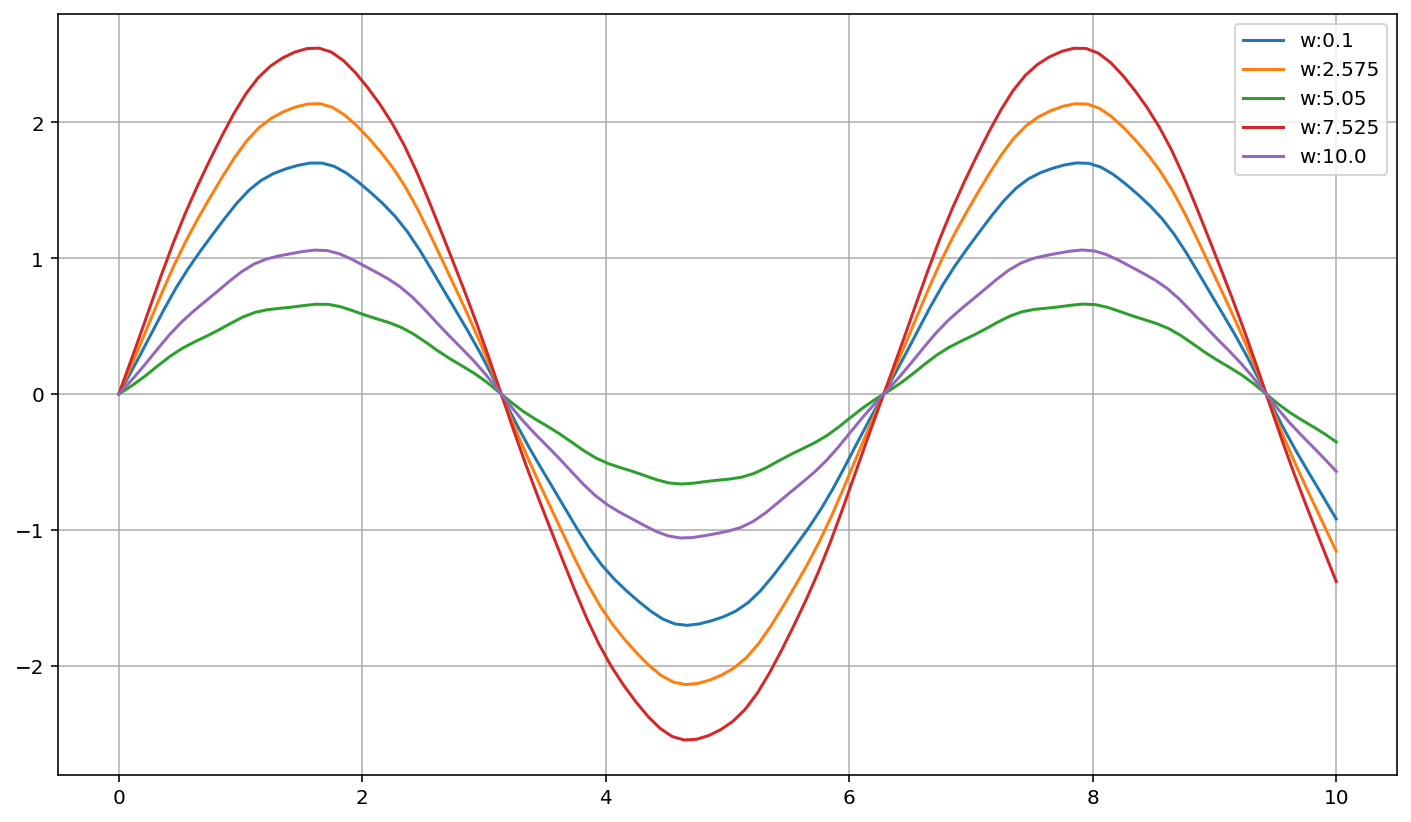

<Figure size 864x504 with 0 Axes>

In [25]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SD(t,x):
    x0,x1 = x
    dx0 = x1
    dx1 = (-k*x0**(p-1)) + A*sin(w*t)
    return array((dx0,dx1))

k = 1
p = 2
A = 1
t = 1
dt = 0.1
x = array((-1.5,0))
wvals = linspace(0.1,10,5)

sd_x = []

for w in wvals:
    sd = SD(t,x)
    sd_x.append(sd[1])

n = 0
print(sd_x)
for x in sd_x:
    sol = solve_ivp(SD,[0,10],(0,x),max_step=dt)
    plt.plot(sol.t,sol.y[0],label=f'w:{wvals[n]}')
    n = n + 1

plt.legend()
plt.grid()
plt.figure()

The phenomenon that you have observed is called *resonance*. Investigate it by **plotting the amplitude of oscillation against the frequency on a log-log plot**, for frequencies $\omega$ between about 0.01 and 30, and for $p = 2, 4, 6, 8, 10$ (as different curves on the same axes), keeping the other parameters the same. What do you notice about the strength and frequency of the resonance peak?

No handles with labels found to put in legend.


[[2.353826838832547, 1.3702828052886575, 1.0680868247176818, 1.6422021877777278, 0.9427582237646411, 0.5572393393327996, 2.3575076483640856, 1.7871883486863807, 1.076212673790636, 1.5093314689311759], [4.228826838832547, 3.2452828052886575, 2.943086824717682, 3.5172021877777278, 2.817758223764641, 2.4322393393327997, 4.232507648364085, 3.6621883486863807, 2.9512126737906357, 3.3843314689311756], [8.447576838832548, 7.4640328052886575, 7.161836824717682, 7.735952187777728, 7.036508223764641, 6.650989339332799, 8.451257648364086, 7.880938348686381, 7.169962673790636, 7.603081468931176], [17.939764338832546, 16.956220305288657, 16.654024324717682, 17.228139687777727, 16.528695723764642, 16.1431768393328, 17.943445148364084, 17.37312584868638, 16.662150173790636, 17.095268968931176], [39.297186213832546, 38.31364218028866, 38.01144619971768, 38.58556156277773, 37.88611759876464, 37.5005987143328, 39.300867023364084, 38.73054772368638, 38.019572048790636, 38.45269084393117]]


<Figure size 864x504 with 0 Axes>

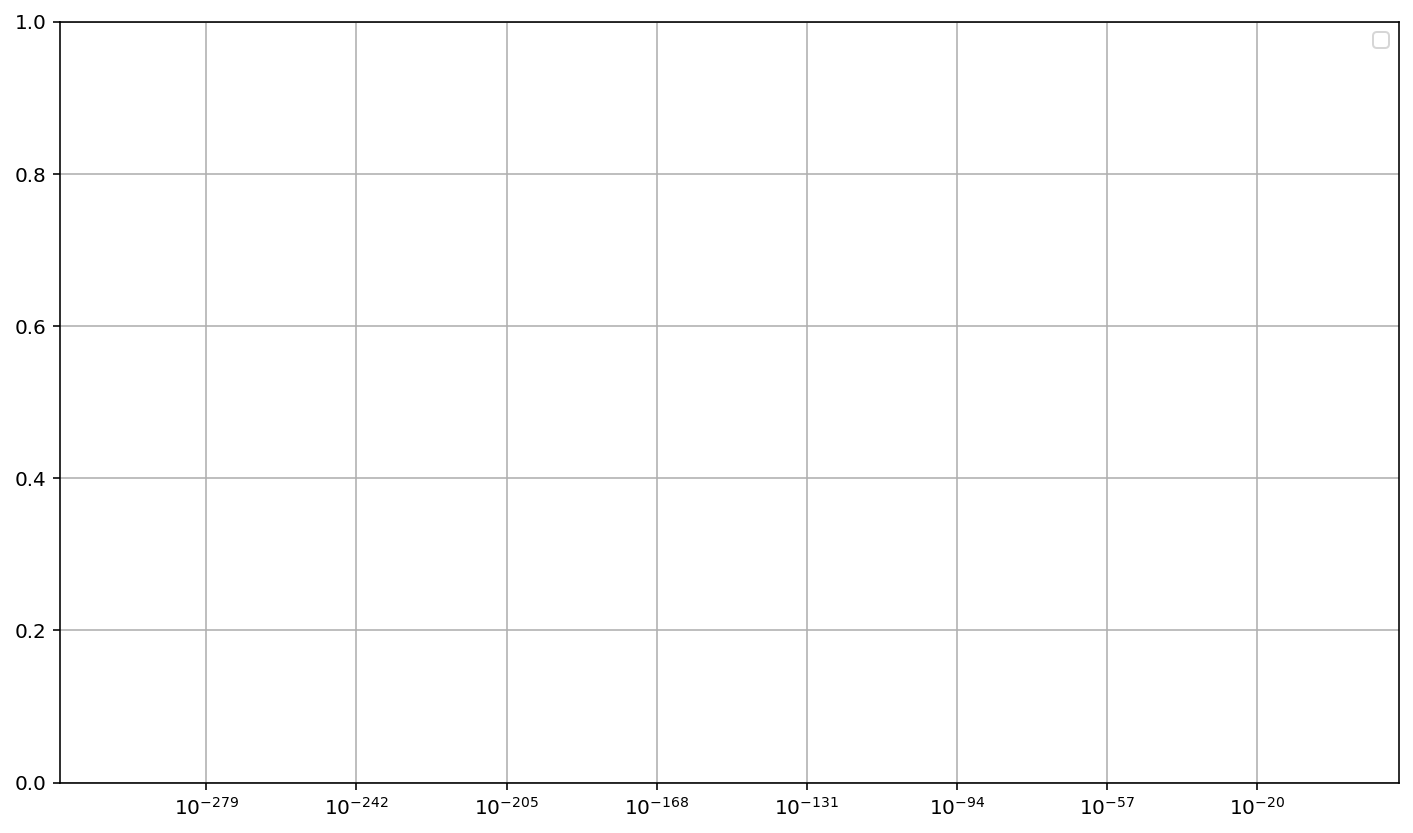

<Figure size 864x504 with 0 Axes>

In [32]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SD(t,x):
    x0,x1 = x
    dx0 = x1
    dx1 = (-k*x0**(p-1)) + A*sin(w*t)
    return array((dx0,dx1))

k = 1
p = 2
A = 1
t = 1
dt = 0.1
x = array((-1.5,0))
wvals = logspace(0.01,30,10)
pvals = [2,4,6,8,10]

sd_x = []
sd_x_all = []

for p in pvals:
    for w in wvals:
        sd = SD(t,x)
        sd_x.append(sd[1])
    sd_x_all.append(sd_x)
    sd_x = []

count = 0
for nn in sd_x_all:
    for x in nn:
        sol = solve_ivp(SD,[0,10],(0,x),max_step=dt)
    #plt.plot(sol.t,sol.y[0])
    n = n + 1
print(sd_x_all)
plt.grid()
plt.xscale('log')
plt.legend()
plt.figure()

2.0
1.532043315250738
3.106901649220608
2.838793507452805
2.095129088361872
1.5210123517564853
1.5254604796611617
1.6065791237739384
1.526463597978356
1.4892206954799443
1.5447344894753974
1.525457648471358
1.4859422454693363
1.5183774997406383
1.518579755717398
1.4953439417691192
1.5074399594298051
1.5140524085782425
1.5009146887712632
1.5012120526764747
1.5113553311920251
1.505625067599949
1.4999238121398726
1.5060971717762601
1.5042140530398687
1.496252481963742
1.5033852418939837
1.5044170292908083
1.4956293752040561
1.498126088684542
1.4991726602705742
1.4952211268890598
1.494141037323481
1.4991494200604516
1.4975201105007738
1.494313179124937
1.4963866466241074
1.4948481792016568
1.4948551734999687
1.4980748273146693
1.4940633565619479
1.491904348793677
1.4936240998697363
1.4985127312025828


1.4942505626150828
1.4959057904689332
1.4957237840397817
1.493625413359047
1.4885828236078842
1.4903565804313381
1.4878178398491413


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

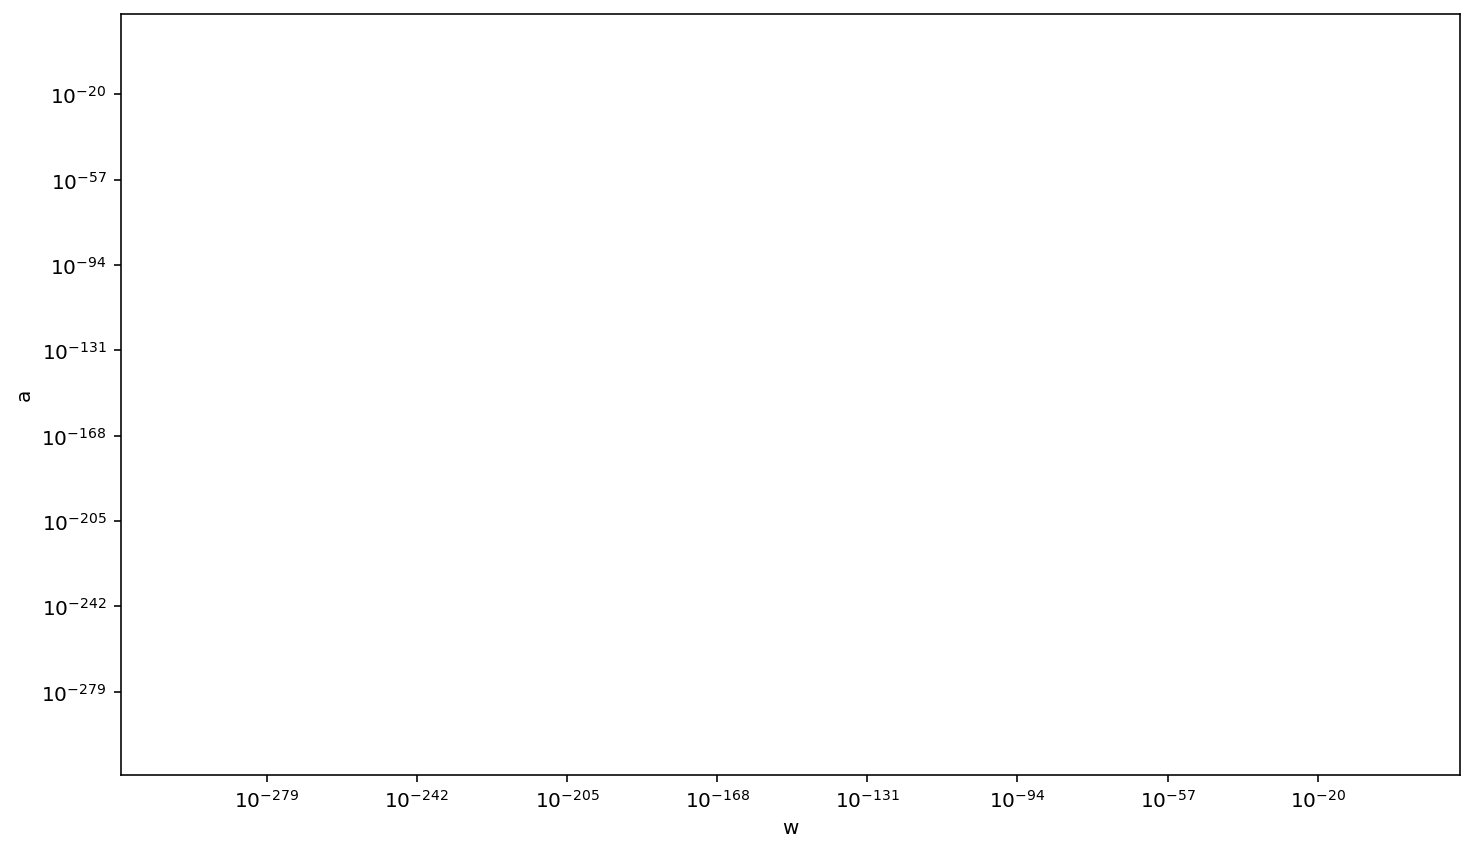

In [38]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SD2(t,x):
    x0,x1 = x
    dx0 = x1 # first derivative
    dx1 = (-k*x0**(p-1)) + A*sin(w*t) # second derivative
    return array((dx0,dx1))

k = 1
m = 1
A = 1

plt.figure()
plt.xlabel('w')
plt.ylabel('a')
pvals = linspace(2,10,5)
wvals = linspace(0.01,30,50)
for p in pvals:
    print(p)
    for w in wvals:
        ampvals = []
        if p == 2:
            t_up = 4
        elif p == 4:
            t_up = 3
        else:
            t_up = 2
        tspan = array((0,t_up))
        x = array((-1.5,0))
        teval = linspace(0,t_up,100)
        sol = solve_ivp(SD2,tspan,x,t_eval = teval)
        xmax = argmax(sol.y[0])
        xnum = sol.y[0][xmax]
        ampvals.append(xnum)
    plt.xscale('log')
    plt.yscale('log')
    ampvals = array(ampvals)
    plt.plot(wvals,ampvals)
plt.grid()


▶ **CHECKPOINT 3**

**Extension:** investigate the oscillation patterns of the nonlinear oscillators near their resonant frequencies (that is, at frequencies near the peak in the previous graph). Can you explain what is happening?